<a href="https://colab.research.google.com/github/Himosh/CV_Assignment_1/blob/master/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python matplotlib --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For image display in Colab

In [20]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Create output folder path
output_dir = "/content/drive/MyDrive/EC7212/IntensityReduction"
os.makedirs(output_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from google.colab import files
uploaded = files.upload()

Saving traffic-sign.jpg to traffic-sign.jpg


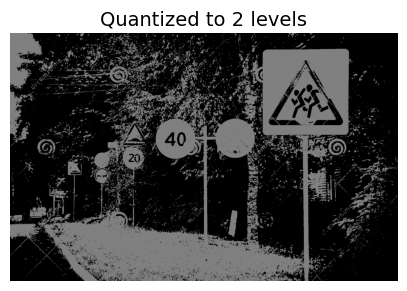

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_2_titled.png


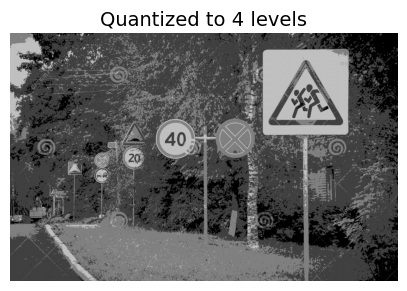

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_4_titled.png


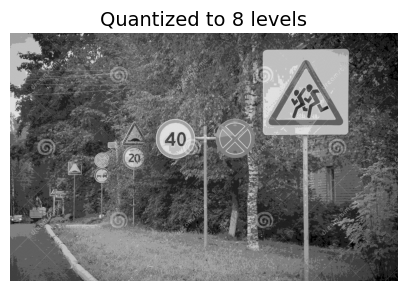

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_8_titled.png


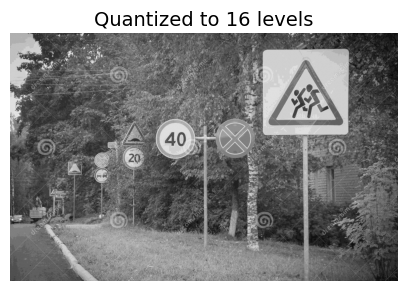

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_16_titled.png


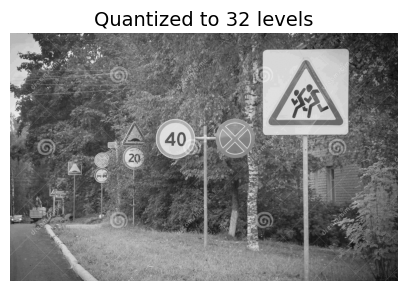

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_32_titled.png


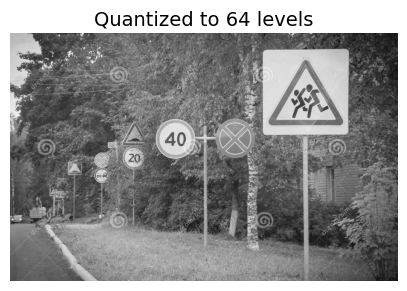

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_64_titled.png


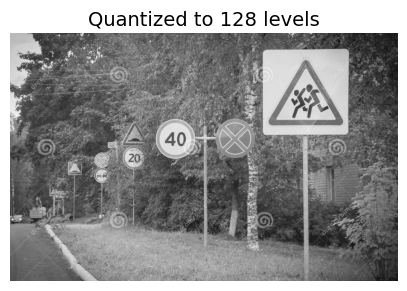

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_128_titled.png


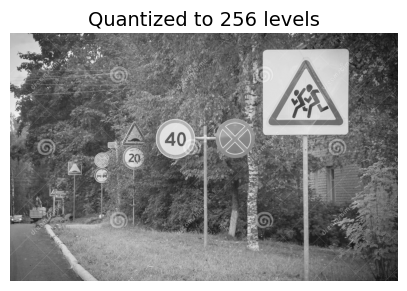

Saved with tag: /content/drive/MyDrive/EC7212/IntensityReduction/traffic-sign_quantized_256_titled.png


In [21]:
# Function to reduce intensity levels
def reduce_intensity(img, levels):
    factor = 256 // levels
    reduced = (img // factor) * factor
    return reduced.astype(np.uint8)

# Load image (grayscale)
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)
filename_base = os.path.splitext(list(uploaded.keys())[0])[0]

# Process and save with title
for level in [2, 4, 8, 16, 32, 64, 128, 256]:
    reduced = reduce_intensity(image, level)

    # Plot with title
    plt.figure(figsize=(5, 5))
    plt.imshow(reduced, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Quantized to {level} levels', fontsize=14)
    plt.axis('off')

    # Save figure with title as image
    save_path = os.path.join(output_dir, f"{filename_base}_quantized_{level}_titled.png")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print(f"Saved with tag: {save_path}")

In [26]:
import os

# Create folder for blurring results
blur_dir = "/content/drive/MyDrive/EC7212/SpatialAveraging"
os.makedirs(blur_dir, exist_ok=True)

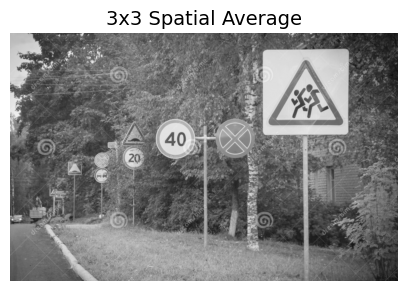

Saved: /content/drive/MyDrive/EC7212/SpatialAveraging/traffic-sign_blur_3x3_titled.png


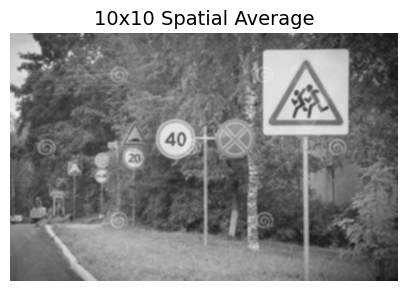

Saved: /content/drive/MyDrive/EC7212/SpatialAveraging/traffic-sign_blur_10x10_titled.png


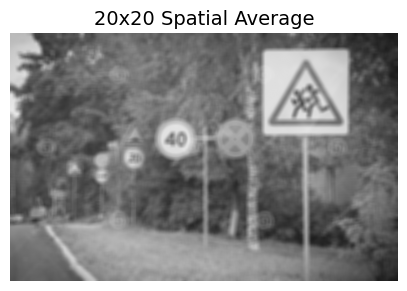

Saved: /content/drive/MyDrive/EC7212/SpatialAveraging/traffic-sign_blur_20x20_titled.png


In [27]:
def spatial_average(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))

# Reuse grayscale image
filename_base = os.path.splitext(list(uploaded.keys())[0])[0]

# Apply different kernel sizes and save
for k in [3, 10, 20]:
    blurred = spatial_average(image, k)

    # Display with matplotlib and title
    plt.figure(figsize=(5, 5))
    plt.imshow(blurred, cmap='gray', vmin=0, vmax=255)
    plt.title(f'{k}x{k} Spatial Average', fontsize=14)
    plt.axis('off')

    # Save image with title in Google Drive
    save_path = os.path.join(blur_dir, f"{filename_base}_blur_{k}x{k}_titled.png")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print(f"Saved: {save_path}")

In [28]:
# Create directory for rotated images
rotate_dir = "/content/drive/MyDrive/EC7212/ImageRotation"
os.makedirs(rotate_dir, exist_ok=True)

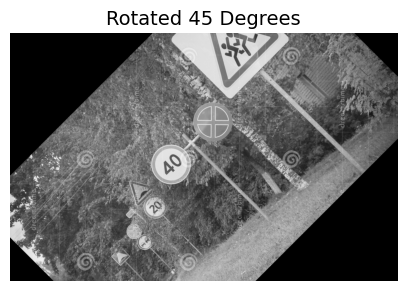

Saved: /content/drive/MyDrive/EC7212/ImageRotation/traffic-sign_rotated_45_titled.png


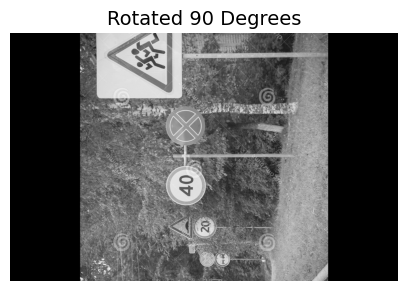

Saved: /content/drive/MyDrive/EC7212/ImageRotation/traffic-sign_rotated_90_titled.png


In [29]:
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, matrix, (w, h))
    return rotated

# Base filename
filename_base = os.path.splitext(list(uploaded.keys())[0])[0]

# Rotate by 45° and 90° and save
for angle in [45, 90]:
    rotated = rotate_image(image, angle)

    # Show with matplotlib and tag
    plt.figure(figsize=(5, 5))
    plt.imshow(rotated, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Rotated {angle} Degrees', fontsize=14)
    plt.axis('off')

    # Save to Google Drive
    save_path = os.path.join(rotate_dir, f"{filename_base}_rotated_{angle}_titled.png")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print(f"Saved: {save_path}")

In [30]:
# Create folder for block-averaged images
block_dir = "/content/drive/MyDrive/EC7212/BlockAveraging"
os.makedirs(block_dir, exist_ok=True)

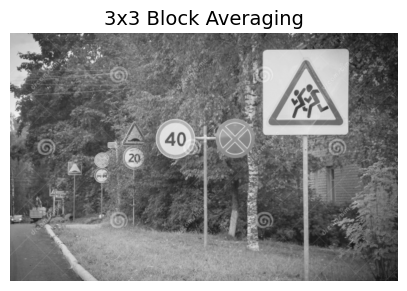

Saved: /content/drive/MyDrive/EC7212/BlockAveraging/traffic-sign_blockavg_3x3_titled.png


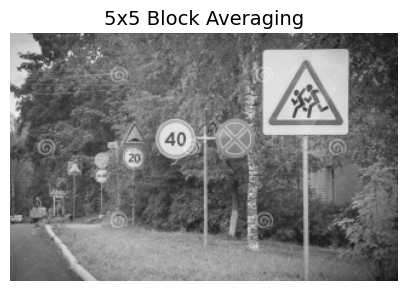

Saved: /content/drive/MyDrive/EC7212/BlockAveraging/traffic-sign_blockavg_5x5_titled.png


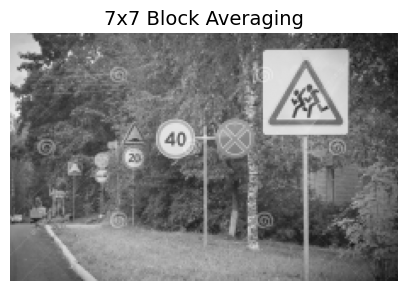

Saved: /content/drive/MyDrive/EC7212/BlockAveraging/traffic-sign_blockavg_7x7_titled.png


In [31]:
def block_average(img, block_size):
    h, w = img.shape
    output = img.copy()

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = img[y:y+block_size, x:x+block_size]
            avg = int(np.mean(block))
            output[y:y+block_size, x:x+block_size] = avg

    return output

# Base file name
filename_base = os.path.splitext(list(uploaded.keys())[0])[0]

# Apply for 3x3, 5x5, and 7x7 blocks
for b in [3, 5, 7]:
    downsampled = block_average(image, b)

    # Show with matplotlib and title
    plt.figure(figsize=(5, 5))
    plt.imshow(downsampled, cmap='gray', vmin=0, vmax=255)
    plt.title(f'{b}x{b} Block Averaging', fontsize=14)
    plt.axis('off')

    # Save to Google Drive
    save_path = os.path.join(block_dir, f"{filename_base}_blockavg_{b}x{b}_titled.png")
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print(f"Saved: {save_path}")